In [ ]:
import pandas as pd

import numpy as np
np.random.seed(1337)


dataset_A = pd.read_csv('../TSPA.csv', sep=';', names=['x', 'y', 'cost'])
dataset_B = pd.read_csv('../TSPB.csv', sep=';', names=['x', 'y', 'cost'])

dataset_A.shape, dataset_B.shape

((200, 3), (200, 3))

In [ ]:
node1, node2 = dataset_B.iloc[177], dataset_B.iloc[43]

print(f'{node1}\n\n{node2}')

x       1450
y        398
cost      52
Name: 177, dtype: int64

x       1654
y       1486
cost     638
Name: 43, dtype: int64


In [ ]:
def euclidean_distance(node1, node2):
    return np.int32(((node1['x'] - node2['x']) ** 2 + (node1['y'] - node2['y']) ** 2) ** 0.5 + 0.5)

In [ ]:
print(f'distance between node1 and node2 = {euclidean_distance(node1, node2)}')

distance between node1 and node2 = 1107


In [ ]:
def nodes_cost(node1, node2):
    return node1['cost'] + node2['cost']

In [ ]:
print(f'objective function of node1 and node2 = {euclidean_distance(node1, node2) + nodes_cost(node1, node2)}')

objective function of node1 and node2 = 1797


In [ ]:
def calculate_function_cost(dataset):
    cost = 0

    x = dataset['x'].to_numpy()
    y = dataset['y'].to_numpy()

    for i in range(len(x) - 1):
        cost += euclidean_distance({'x': x[i], 'y': y[i]}, {'x': x[i+1], 'y': y[i+1]})

    cost += euclidean_distance({'x': x[-1], 'y': y[-1]}, {'x': x[0], 'y': y[0]})

    cost += dataset['cost'].sum()

    return int(cost)

In [ ]:
def calculate_distance_matrix(dataset):
    num_nodes = len(dataset)

    distance_matrix = np.zeros((num_nodes, num_nodes), dtype=np.float64)

    for i in range(num_nodes):
        for j in range(num_nodes):
            if i != j:
                node1 = dataset.iloc[i]
                node2 = dataset.iloc[j]
                distance = euclidean_distance(node1, node2)

                if np.isinf(distance) or np.isnan(distance):
                    raise ValueError(f"Invalid distance encountered between nodes {i} and {j}")

                cost = nodes_cost(node1, node2)
                distance_matrix[i, j] = distance + cost

    return distance_matrix

In [ ]:
distance_matrices = []

for dataset in [dataset_A, dataset_B]:
    distance_matrices.append(calculate_distance_matrix(dataset))

In [ ]:
print(f'objective function of node1 and node2 = {distance_matrices[1][177, 43]}')

objective function of node1 and node2 = 1797.0


In [ ]:
import matplotlib.pyplot as plt

import seaborn as sns

def plot(dataset, solution=None):
    max_x = dataset['x'].max()
    max_y = dataset['y'].max()

    aspect_ratio = int(max_x / max_y)

    if max_x > max_y:
        height = 6.0
        width = height * aspect_ratio
    else:
        width = 6.0
        height = width * aspect_ratio

    sns.set_theme(rc={'figure.figsize': (width, height)})

    sns.scatterplot(
        data=dataset,
        x='x',
        y='y',
        size='cost',
        legend=False
    )

    if isinstance(solution, pd.DataFrame):
        x = solution['x'].to_numpy()
        y = solution['y'].to_numpy()

        for i in range(len(x) - 1):
            plt.plot([x[i], x[i + 1]], [y[i], y[i + 1]], color='b', linestyle='-')

        plt.plot([x[-1], x[0]], [y[-1], y[0]], color='b', linestyle='-')

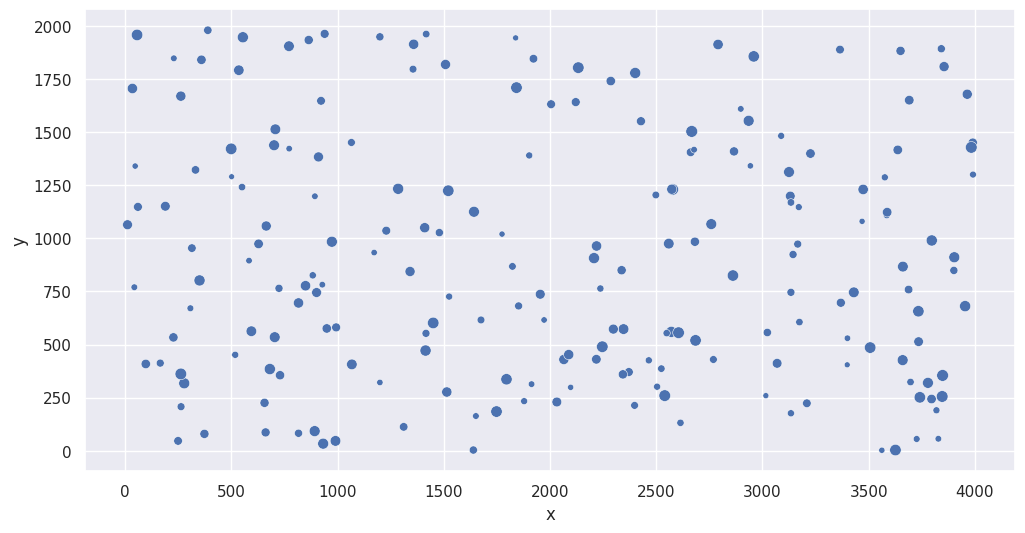

In [ ]:
plot(dataset_A)
plt.show()

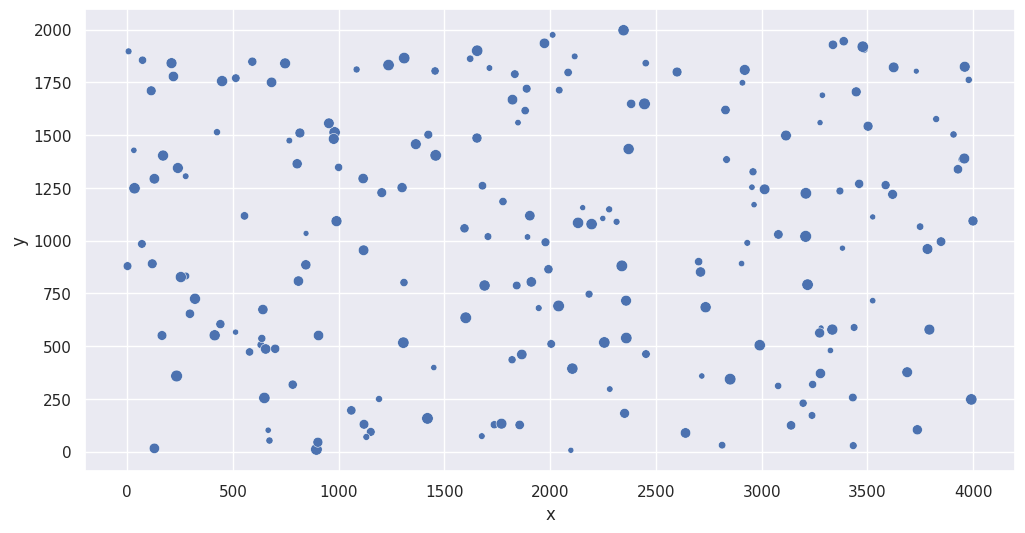

In [ ]:
plot(dataset_B)
plt.show()

# Greedy 2-regret heuristic

Pseudocode:

```
start from the first city
repeat while tour is not complete:
    find the next city using regret (diff. between two smallest distances)
    sort by minimum distance first, then by maximum regret
    choose the city with the smallest distance (ties broken by highest regret)
    update the tour
return tour
```

In [ ]:
def tsp_greedy_regret(distances, starting_city=0):
    num_cities = len(distances)
    size = int(0.5 * num_cities + 0.5)
    # Track visited cities and initialize tour
    visited = np.zeros(num_cities, dtype=bool)
    tour = [0]  # Start at city 0
    visited[0] = True
    current_city = starting_city

    # Use NumPy slicing to exclude already visited cities
    while len(tour) < size:
        # Get distances from the current city to all unvisited cities
        unvisited_mask = ~visited
        unvisited_distances = distances[current_city, unvisited_mask]

        # Get the indices of unvisited cities
        unvisited_indices = np.where(unvisited_mask)[0]

        # Sort distances to unvisited cities and calculate 2-regret
        sorted_distances = np.sort(unvisited_distances)
        if len(sorted_distances) > 1:
            regret_2 = sorted_distances[1] - sorted_distances[0]
        else:
            regret_2 = 0  # If only one city remains

        # Select the next city by choosing the one with the smallest distance,
        # and if tied, the one with the largest regret
        min_distance = np.min(unvisited_distances)
        next_city_candidates = unvisited_indices[unvisited_distances == min_distance]

        # If there are multiple cities with the same minimum distance, break the tie using regret
        if len(next_city_candidates) > 1:
            next_city = next_city_candidates[np.argmax(regret_2)]
        else:
            next_city = next_city_candidates[0]

        # Add the selected city to the tour
        tour.append(next_city)
        visited[next_city] = True
        current_city = next_city

    # Return to the starting city to complete the tour
    tour.append(tour[0])

    return tour

[0, 117, 143, 183, 137, 176, 63, 53, 180, 154, 135, 123, 65, 116, 59, 115, 139, 193, 41, 42, 160, 34, 22, 18, 108, 69, 159, 181, 184, 177, 54, 30, 48, 43, 151, 133, 80, 79, 94, 97, 101, 1, 152, 120, 78, 145, 185, 40, 165, 90, 81, 113, 175, 171, 16, 31, 44, 92, 57, 106, 49, 144, 62, 14, 178, 52, 55, 129, 2, 75, 86, 26, 100, 121, 148, 9, 102, 15, 186, 23, 89, 114, 51, 162, 127, 70, 112, 4, 84, 35, 149, 131, 118, 46, 68, 93, 140, 36, 163, 199, 0]
Objective function = 83045
################################

Min: 83045
Average: 87101.555
Max: 90964


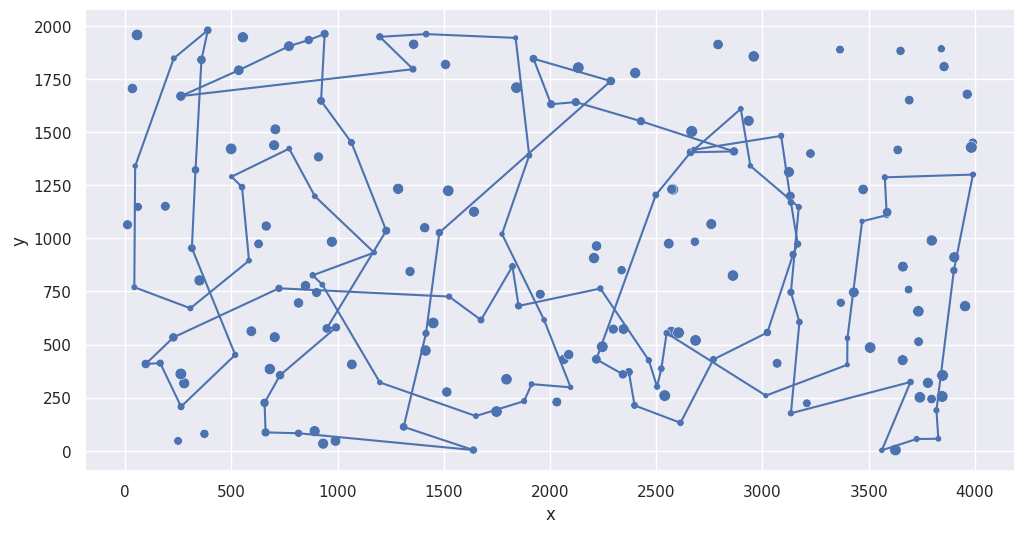

[0, 36, 61, 141, 77, 153, 163, 176, 113, 166, 86, 185, 179, 94, 47, 148, 20, 60, 28, 140, 183, 152, 18, 62, 124, 106, 143, 35, 29, 109, 33, 138, 11, 168, 169, 188, 70, 3, 145, 15, 155, 189, 34, 55, 95, 130, 99, 22, 66, 154, 57, 172, 194, 103, 127, 89, 137, 114, 165, 187, 146, 81, 111, 8, 104, 177, 5, 175, 78, 190, 80, 117, 31, 54, 193, 73, 121, 90, 122, 135, 63, 40, 107, 100, 133, 10, 147, 6, 134, 139, 182, 25, 21, 82, 144, 160, 49, 195, 13, 132, 0]
Objective function = 52966
################################

Min: 52966
Average: 55287.83
Max: 59139


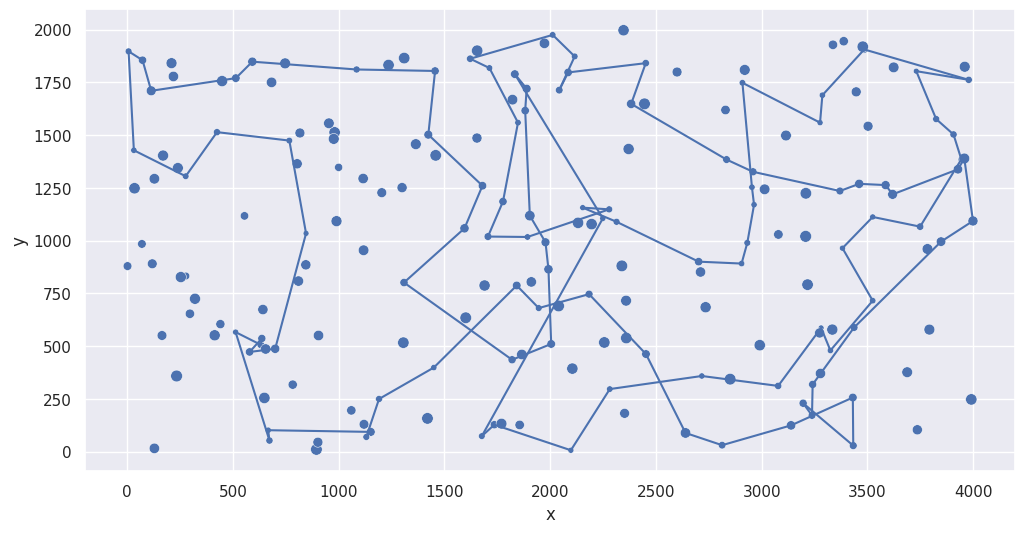

In [ ]:
for distance_matrix, dataset in enumerate([dataset_A, dataset_B]):
    rating = []

    for idx in range(200):
        regret_solution = tsp_greedy_regret(distance_matrices[distance_matrix], idx)
        # print(f'Soltuion #{idx} complete')
        regret_solution = dataset.loc[regret_solution]

        solution = list(regret_solution.index)

        rating.append((solution, calculate_function_cost(regret_solution)))

    best_solution = sorted(rating, key=lambda x: x[1])[0]

    print(best_solution[0])
    print(f'Objective function = {best_solution[1]}')
    print('################################\n')

    print(f"Min: {sorted(rating, key=lambda x: x[1])[0][1]}")

    average = sum([obj_function for solution, obj_function in rating])/len(rating)

    print(f'Average: {average}')
    print(f"Max: {sorted(rating, key=lambda x: x[1])[-1][1]}")

    plot(dataset, solution=dataset.loc[best_solution[0]])
    plt.show()

# Greedy Weighted Sum Criterion

In [ ]:
# Greedy heuristic with regret
def tsp_greedy_weighted_sum(distances, starting_city=0, w1=1.0, w2=1.0):
    num_cities = len(distances)
    size = int(0.5 * num_cities + 0.5)

    visited = np.zeros(num_cities, dtype=bool)
    tour = [0]  # Start at city 0
    visited[0] = True
    current_city = starting_city

    # Use NumPy slicing to exclude already visited cities
    while len(tour) < size:
        # Get distances from the current city to all unvisited cities
        unvisited_mask = ~visited
        unvisited_distances = distances[current_city, unvisited_mask]

        # Get the indices of unvisited cities
        unvisited_indices = np.where(unvisited_mask)[0]

        # Sort distances to unvisited cities and calculate 2-regret
        sorted_distances = np.sort(unvisited_distances)
        if len(sorted_distances) > 1:
            regret = sorted_distances[1] - sorted_distances[0]
        else:
            regret = 0  # If only one city remains

        # Weighted sum criterion: w1 * regret + w2 * distance to the closest city
        weighted_criteria = w1 * regret + w2 * unvisited_distances

        # Find the city with the smallest weighted criterion
        next_city_idx = np.argmin(weighted_criteria)
        next_city = unvisited_indices[next_city_idx]

        # Add the selected city to the tour
        tour.append(next_city)
        visited[next_city] = True
        current_city = next_city

    # Return to the starting city to complete the tour
    tour.append(tour[0])

    return tour


[0, 117, 143, 183, 137, 176, 63, 53, 180, 154, 135, 123, 65, 116, 59, 115, 139, 193, 41, 42, 160, 34, 22, 18, 108, 69, 159, 181, 184, 177, 54, 30, 48, 43, 151, 133, 80, 79, 94, 97, 101, 1, 152, 120, 78, 145, 185, 40, 165, 90, 81, 113, 175, 171, 16, 31, 44, 92, 57, 106, 49, 144, 62, 14, 178, 52, 55, 129, 2, 75, 86, 26, 100, 121, 148, 9, 102, 15, 186, 23, 89, 114, 51, 162, 127, 70, 112, 4, 84, 35, 149, 131, 118, 46, 68, 93, 140, 36, 163, 199, 0]
Objective function = 83045
################################

Min: 83045
Average: 87101.555
Max: 90964


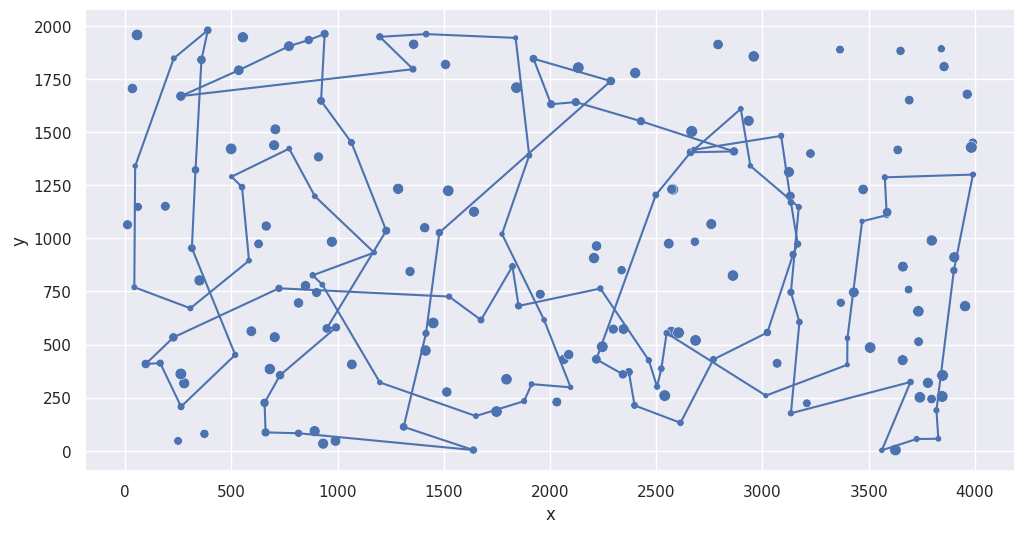

[0, 36, 61, 141, 77, 153, 163, 176, 113, 166, 86, 185, 179, 94, 47, 148, 20, 60, 28, 140, 183, 152, 18, 62, 124, 106, 143, 35, 29, 109, 33, 138, 11, 168, 169, 188, 70, 3, 145, 15, 155, 189, 34, 55, 95, 130, 99, 22, 66, 154, 57, 172, 194, 103, 127, 89, 137, 114, 165, 187, 146, 81, 111, 8, 104, 177, 5, 175, 78, 190, 80, 117, 31, 54, 193, 73, 121, 90, 122, 135, 63, 40, 107, 100, 133, 10, 147, 6, 134, 139, 182, 25, 21, 82, 144, 160, 49, 195, 13, 132, 0]
Objective function = 52966
################################

Min: 52966
Average: 55287.83
Max: 59139


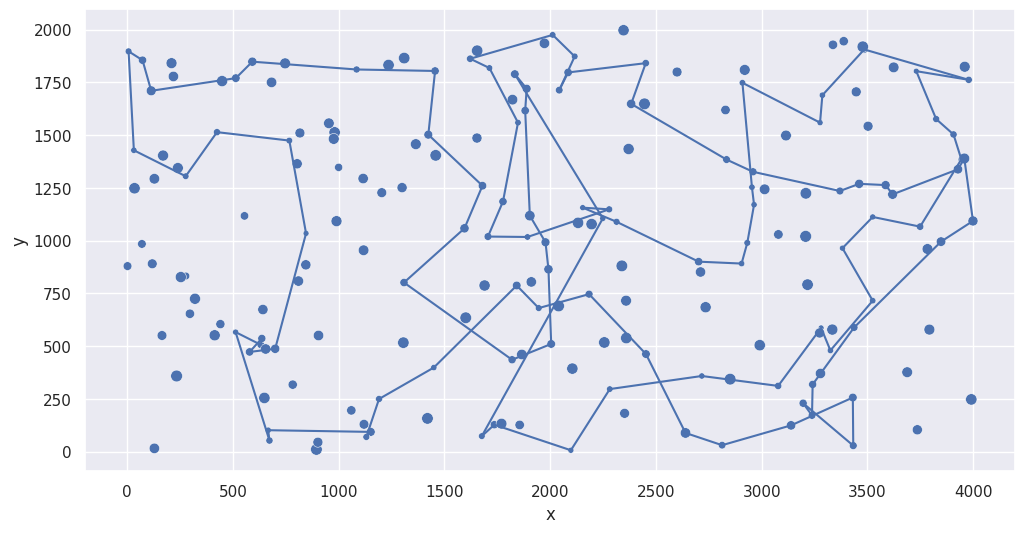

In [ ]:
for distance_matrix, dataset in enumerate([dataset_A, dataset_B]):
    rating = []

    for idx in range(200):
        weighted_sum_solution = tsp_greedy_weighted_sum(distance_matrices[distance_matrix], idx)
        # print(f'Soltuion #{idx} complete')
        weighted_sum_solution = dataset.loc[weighted_sum_solution]

        solution = list(weighted_sum_solution.index)

        rating.append((solution, calculate_function_cost(weighted_sum_solution)))

    best_solution = sorted(rating, key=lambda x: x[1])[0]

    print(best_solution[0])
    print(f'Objective function = {best_solution[1]}')
    print('################################\n')

    print(f"Min: {sorted(rating, key=lambda x: x[1])[0][1]}")

    average = sum([obj_function for solution, obj_function in rating])/len(rating)

    print(f'Average: {average}')
    print(f"Max: {sorted(rating, key=lambda x: x[1])[-1][1]}")

    plot(dataset, solution=dataset.loc[best_solution[0]])
    plt.show()

[0, 117, 143, 183, 137, 176, 63, 53, 180, 154, 135, 123, 65, 116, 59, 115, 139, 193, 41, 42, 160, 34, 22, 18, 108, 69, 159, 181, 184, 177, 54, 30, 48, 43, 151, 133, 80, 79, 94, 97, 101, 1, 152, 120, 78, 145, 185, 40, 165, 90, 81, 113, 175, 171, 16, 31, 44, 92, 57, 106, 49, 144, 62, 14, 178, 52, 55, 129, 2, 75, 86, 26, 100, 121, 148, 9, 102, 15, 186, 23, 89, 114, 51, 162, 127, 70, 112, 4, 84, 35, 149, 131, 118, 46, 68, 93, 140, 36, 163, 199, 0]
Objective function = 83045
################################

Min: 83045
Average: 87101.555
Max: 90964


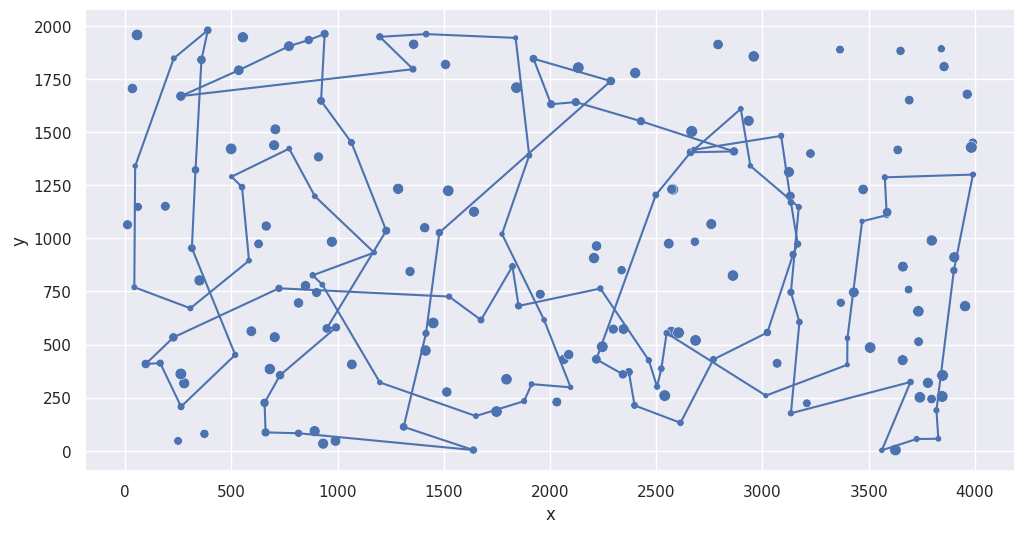

[0, 36, 61, 141, 77, 153, 163, 176, 113, 166, 86, 185, 179, 94, 47, 148, 20, 60, 28, 140, 183, 152, 18, 62, 124, 106, 143, 35, 29, 109, 33, 138, 11, 168, 169, 188, 70, 3, 145, 15, 155, 189, 34, 55, 95, 130, 99, 22, 66, 154, 57, 172, 194, 103, 127, 89, 137, 114, 165, 187, 146, 81, 111, 8, 104, 177, 5, 175, 78, 190, 80, 117, 31, 54, 193, 73, 121, 90, 122, 135, 63, 40, 107, 100, 133, 10, 147, 6, 134, 139, 182, 25, 21, 82, 144, 160, 49, 195, 13, 132, 0]
Objective function = 52966
################################

Min: 52966
Average: 55287.83
Max: 59139


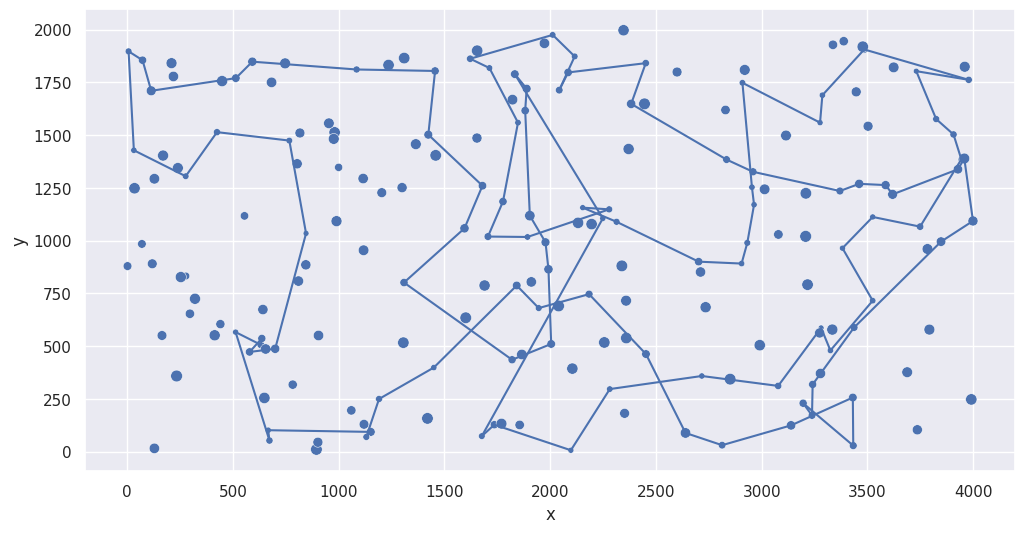

In [23]:
for distance_matrix, dataset in enumerate([dataset_A, dataset_B]):
    rating = []

    for idx in range(200):
        weighted_sum_solution = tsp_greedy_weighted_sum(distance_matrices[distance_matrix], idx, w1=3.0, w2=1.0)
        # print(f'Soltuion #{idx} complete')
        weighted_sum_solution = dataset.loc[weighted_sum_solution]

        solution = list(weighted_sum_solution.index)

        rating.append((solution, calculate_function_cost(weighted_sum_solution)))

    best_solution = sorted(rating, key=lambda x: x[1])[0]

    print(best_solution[0])
    print(f'Objective function = {best_solution[1]}')
    print('################################\n')

    print(f"Min: {sorted(rating, key=lambda x: x[1])[0][1]}")

    average = sum([obj_function for solution, obj_function in rating])/len(rating)

    print(f'Average: {average}')
    print(f"Max: {sorted(rating, key=lambda x: x[1])[-1][1]}")

    plot(dataset, solution=dataset.loc[best_solution[0]])
    plt.show()